MNIST

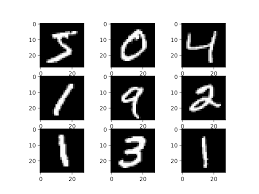

In [23]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


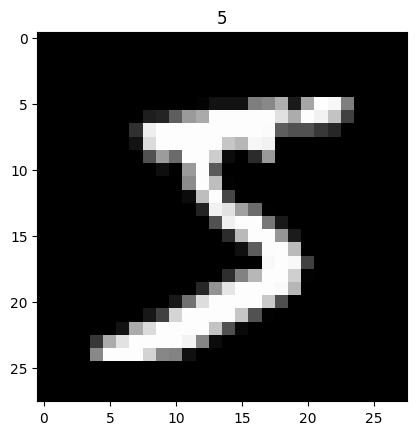

In [7]:
plt.imshow(x_train[0],cmap='gray')
plt.title(y_train[0])
plt.show()

In [28]:
# appling scaling (each pixel 0-->255 )
x_train=(x_train-np.average(x_train))/np.std(x_train)
x_test=(x_train-np.average(x_train))/np.std(x_train)

In [29]:
from sklearn.model_selection import train_test_split
x_train, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2)
#as 15% from all data = 20% from (70% data)

# Model

In [14]:
# The Flatten layer in Keras is used to reshape the input tensor into a 1D array.
# It takes an input tensor of any shape and flattens it into a single long sequence of values.

In [15]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Reshape,Input

def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasClassifier(build_fn=createmodel, verbose = False)  

activation_funcs = ['sigmoid', 'relu', 'tanh'] 
loss_funcs = ['binary_crossentropy','hinge']
param_grid = dict(n_layers=[2,3,4,5], first_layer_nodes = [64,32,16], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [100], epochs = [20,60])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [30]:
latent_size=32

# Encoder Archeticture
encoder=Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(512,activation='relu')),
encoder.add(Dropout(0.5))

encoder.add(Dense(128,activation='relu')),
encoder.add(Dropout(0.5))

encoder.add(Dense(64,activation='relu'))
encoder.add(Dropout(0.5))

encoder.add(Dense(latent_size,activation='sigmoid'))

# sigmoid is the activation function that used in Auto encoder to ensure that the output values are bounded between 0 and 1,
#  which is useful for image data where the pixel values are typically normalized to this range.

In [31]:
#Decoder Archeticture
decoder=Sequential()
decoder.add(Dense(64,input_shape=(latent_size,)))
decoder.add(Dropout(0.5))

decoder.add(Dense(128,activation='relu'))
decoder.add(Dropout(0.5))

decoder.add(Dense(512,activation='relu'))
decoder.add(Dropout(0.5))

decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape((28,28)))

In [37]:
img=Input(shape=(28,28))
latent_vector=encoder(img)
output=decoder(latent_vector)

model=Model(inputs=img,outputs=output)
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics = ["accuracy"]) 

In [43]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_2 (Sequential)   (None, 32)                477920    
                                                                 
 sequential_3 (Sequential)   (None, 28, 28)            478672    
                                                                 
Total params: 956592 (3.65 MB)
Trainable params: 956592 (3.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history=model.fit(x_train ,x_train , batch_size=64 , epochs=50)

Epoch 1/50
600/600 [==============================] - 21s 30ms/step - loss: -4.8799 - accuracy: 0.1352
Epoch 2/50
600/600 [==============================] - 18s 31ms/step - loss: -4.9750 - accuracy: 0.1659
Epoch 3/50
600/600 [==============================] - 17s 28ms/step - loss: -5.0288 - accuracy: 0.1916
Epoch 4/50
600/600 [==============================] - 19s 32ms/step - loss: -5.0744 - accuracy: 0.2039
Epoch 5/50
600/600 [==============================] - 21s 35ms/step - loss: -5.1029 - accuracy: 0.2082
Epoch 6/50
600/600 [==============================] - 19s 32ms/step - loss: -5.1309 - accuracy: 0.2176
Epoch 7/50
600/600 [==============================] - 17s 29ms/step - loss: -5.1586 - accuracy: 0.2173
Epoch 8/50
600/600 [==============================] - 17s 29ms/step - loss: -5.1825 - accuracy: 0.2136
Epoch 9/50
600/600 [==============================] - 18s 30ms/step - loss: -5.1976 - accuracy: 0.2128
Epoch 10/50
600/600 [==============================] - 18s 30ms/step - lo

Train Model and Visualize Result

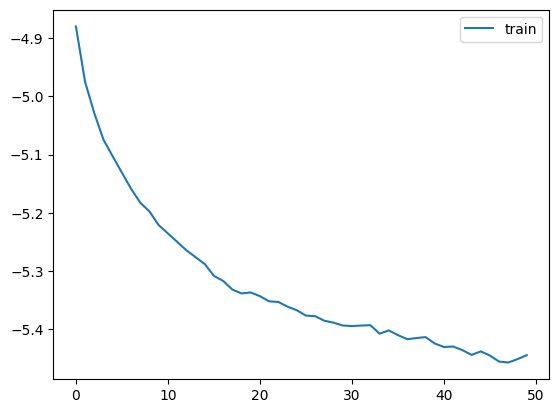

In [40]:
plt.plot(history.history['loss'],label='train')
plt.legend()
plt.show()

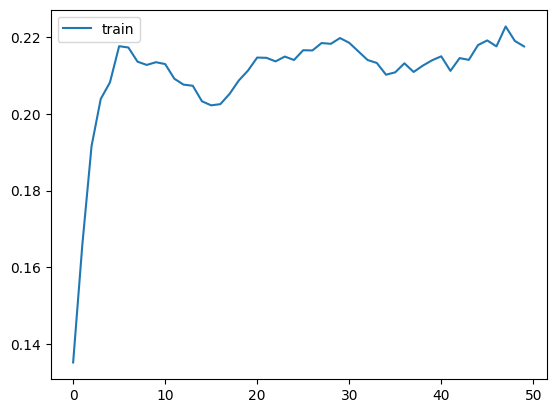

In [41]:
plt.plot(history.history['accuracy'],label='train')
plt.legend()
plt.show()

1/1 [==============================] - 0s 139ms/step


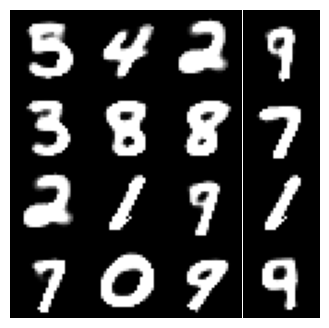

In [42]:
from IPython import display

fig,axs=plt.subplots(4,4,figsize=(4,4))
rand=x_test[np.random.randint(0,10000,16)].reshape((4,4,1,28,28))



for i in range(4):
    for j in range(4):
        axs[i,j].imshow(model.predict(rand[i,j])[0],cmap="gray")
        axs[i,j].axis("off")

plt.subplots_adjust(wspace=0,hspace=0)
plt.show()